In [2]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error: 'data/test_data_user_knowledge' does not exist in current working directory ('/home/jovyan/dsci-100-group-151').


Proposal for Data Science 100 Group Project


Accumulation of knowledge is an important part of education. However, one might wonder what would be the best way to gain knowledge? And what may affect one's knowledge level on a particular subject?

Our question is:
How can we classify the knowledge level of a student with their study time, degree of repetition, and exam performace? Is there a more accurate way to classify the knowledge level with other parameters?

For our project, we will be using the User Knowledge Modeling Data Set, retrieved from https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling#. 

This data set contains data about the knowledge level of students on the subject of electrical DC machines, along with information about each students' study time, degree of repetition on the subject, study time on subjects related to this subject, the exam performance for subjects related to this subject, and exam performace for this subject. 

The data can be downloaded from going to the website and clicking "Data Folder". The data was downloaded, transformed into a csv file, and uploaded into the data folder for this project.

Rows: 258 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): UNS
dbl (5): STG, SCG, STR, LPR, PEG

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


STG,PEG,UNS
<dbl>,<dbl>,<chr>
0.00,0.00,very_low
0.08,0.90,High
0.06,0.33,Low
0.10,0.30,Middle
0.08,0.24,Low


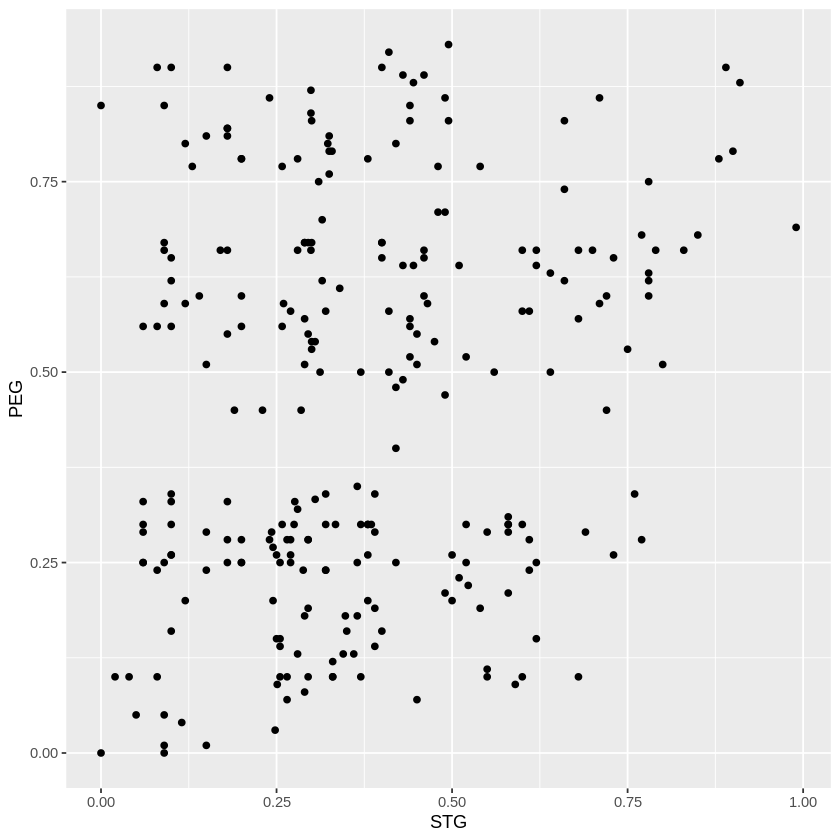

In [17]:
#reading the training data into testing_data object:

training_data <- read_csv("data/training_data_user_knowledge.csv")
#selecting wanted columns
training_data <- select(training_data, STG, PEG, UNS)
#first 5 rows of data
head(training_data, 5)

#showing relation between study time and exam results on subject
ggplot(training_data, aes(x = STG, y = PEG)) +
geom_point() 

For our data analysis, we will use the closest k points method with the columns PEG and STG to classify knowledge levels. We will try to find the best value for k, and see how accurate our model is when tested. One way we will visualize the result is by showing a graph of accuracy against k. This will show clearly the best value for k.

We expect to find higher levels of study time and exam results to higher levels of knowledge. We also do not expect the classification to be very accurate, because the measurement method seems unreliable.

Our finding may show that common beliefs about how study time reflects knowledge may not be statistically correct. Furthermore, it may even show that exams do not test knowledge well. Or, it may confirm these beliefs.

A future question could be to ask: what other variables may affect user knoweldge?

notes (ignore):
STG (The degree of study time for goal object materails), (input value)
SCG (The degree of repetition number of user for goal object materails) (input value)
STR (The degree of study time of user for related objects with goal object) (input value)
LPR (The exam performance of user for related objects with goal object) (input value)
PEG (The exam performance of user for goal objects) (input value)
UNS (The knowledge level of user) (target value)
Very Low: 50
Low:129
Middle: 122
High 130